<a href="https://colab.research.google.com/github/VanshikWaghela/RAG_pipeline/blob/main/Lang_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
name = model.generate_content("I want a name for a Indian cuisine restaurant. Suggest a name")
to_markdown(name.text)

> **Elegant and Traditional**
> * Saffron Palace
> * Jewel of the Ganges
> * Tandoori Mahal
> * Nawab's Feast
> * Maharaja's Kitchen
> 
> **Modern and Urban**
> * Spice Route
> * Curry & Co.
> * Masala Bar
> * India Spice Junction
> * Saffron Empire
> 
> **Regional and Authentic**
> * Punjabi Dhaba
> * Gujarathi Thali
> * Hyderabadi Biryani House
> * Goan Coastal Cuisine
> * Kerala Spice Garden
> 
> **Creative and Playful**
> * Masala Twist
> * Curry Chronicles
> * Spice Odyssey
> * Indian Fusion Delights
> * Naan-Stop Nirvana
> 
> **Historical and Cultural**
> * Mughal Kitchen
> * Ashoka's Table
> * Indus Valley Cuisine
> * Chanakya's Secrets
> * Ahimsa Dining

In [ ]:
! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
llm = ChatGoogleGenerativeAI(model='gemini-pro',google_api_key=GOOGLE_API_KEY)

In [ ]:
result = llm.invoke('What is a poem?')

In [ ]:
to_markdown(result.content)

> A poem is a literary work that uses words, rhythm, and imagery to evoke emotions and ideas. It can be short or long, simple or complex, and can explore a wide range of subjects, from love and loss to nature and the human condition. Poems often use figurative language, such as metaphors and similes, to create vivid and memorable images. They can also use rhyme and meter to create a musical effect. While some poems tell stories, others are more abstract and explore ideas or emotions. Ultimately, the purpose of a poem is to create a unique and personal experience for the reader.

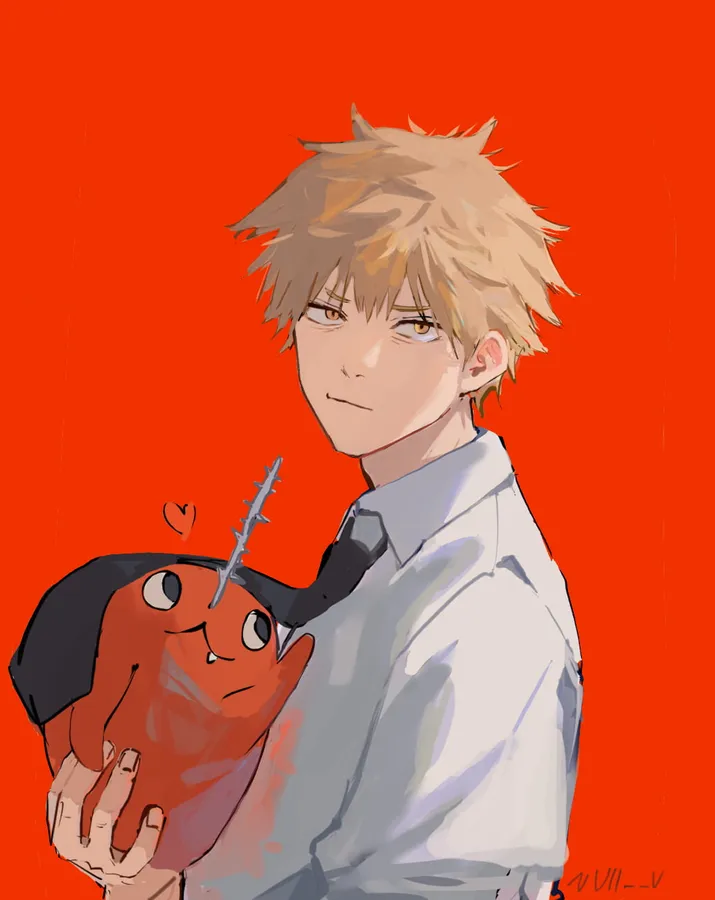

In [ ]:
# prompt: How to show an image from a given url within markdown
import requests
import io
from PIL import Image

def show_image(url):
  response = requests.get(url)
  image = Image.open(io.BytesIO(response.content))
  display(image)

show_image("https://wallpapers.com/images/high/anime-boys-cute-denji-chainsaw-man-qmgkfuk45u7goyw4.webp")

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",google_api_key=GOOGLE_API_KEY)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Make a story based on what you see. ",
        },
        {"type": "image_url", "image_url": "https://images.pexels.com/photos/36717/amazing-animal-beautiful-beautifull.jpg?auto=compress&cs=tinysrgb&w=1200"},
    ]
)
llm.invoke([message])

AIMessage(content=' The sky was a deep, vibrant pink, and the clouds were a light, fluffy white. The sun was just beginning to set, and its rays were casting a golden glow over the horizon. The water was a deep, dark blue, and it was reflecting the light of the sky. The tree was a tall, majestic oak, and its branches were reaching out towards the sky. The leaves were a deep, green, and they were rustling in the breeze. The birds were singing, and the crickets were chirping. It was a peaceful and serene scene.  The tree stood on the edge of a cliff, and its roots were exposed to the wind and rain. The tree had been there for many years, and it had seen many things. It had seen the sun rise and set, and it had seen the moon and stars come out at night. It had seen the seasons change, and it had seen the years pass by. The tree had seen it all, and it was still standing strong.  The tree was a symbol of strength and resilience. It had stood through many storms, and it had always come out 

In [ ]:
!sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain

The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121753 files and directories

In [ ]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.3,google_api_key=GOOGLE_API_KEY)


##Download the document

In [ ]:
data_folder = p.cwd() / "data"
p(data_folder).mkdir(parents=True, exist_ok=True)

pdf_url = "https://services.google.com/fh/files/misc/practitioners_guide_to_mlops_whitepaper.pdf"
pdf_file = str(p(data_folder, pdf_url.split("/")[-1]))

urllib.request.urlretrieve(pdf_url, pdf_file)

('/content/data/practitioners_guide_to_mlops_whitepaper.pdf',
 <http.client.HTTPMessage at 0x7f6085f4d0f0>)

##Extracting text from the PDF

In [ ]:
!pip install pypdf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
outliers= "/content/Taleb Nassim - Fooled by Randomness.pdf"
pdf_loader = PyPDFLoader(pdf_file)
pages= pdf_loader.load_and_split()
print(pages[3].page_content)

4
Organizations can use the framework to identify gaps in building an integrated ML platform and to focus on the scale 
and automate themes from Google’s AI Adoption Framework. The decision about whether (or to which degree) to 
adopt each of these processes and capabilities in your organization depends on your business context. For exam -
ple, you must determine the business value that the framework creates when compared to the cost of purchasing or 
building capabilities (for example, the cost in engineering hours).
Overview of MLOps lifecycle  
and core capabilities
Despite the growing recognition of AI/ML as a crucial pillar of digital transformation, successful deployments and 
effective operations are a bottleneck for getting value from AI. Only one in two organizations has moved beyond 
pilots and proofs of concept. Moreover, 72% of a cohort of organizations that began AI pilots before 2019 have not 
been able to deploy even a single application in production.1 Algorithmia’s sur

##Designing the prompt

In [101]:
prompt_template = '''Answer the question as precise as possible using the provided context. If the answer is
                    not contained in the context, say "answer not available in context"\n
                    Context = \n{context}?\n
                    Question: \n {question} \n
                    Answer:
                  '''

prompt = PromptTemplate (
    template= prompt_template,input_variables = ['context','question']
)

In [102]:
stuff_chain = load_qa_chain(model,chain_type="stuff",prompt= prompt)

In [98]:
question = "Describe data management and feature management systems."


stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

pprint(stuff_answer)


{'output_text': 'Answer not available in context'}


In [104]:
question = "What is Experimentation."


stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

pprint(stuff_answer)


{'output_text': 'Experimentation is the core activity during the ML '
                'development phase where data scientists and ML researchers '
                'prototype model architectures and training routines, create '
                'labeled datasets, and use features and other reusable ML '
                'artifacts that are governed through the data and model '
                'management process.'}


##RAG Pipeline : Embedding + LLM

In [105]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [109]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
context = "\n\n".join(str(p.page_content)for p in pages)
texts = text_splitter.split_text(context)

In [111]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [112]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 6

In [113]:
vector_index = Chroma.from_texts(texts,embeddings).as_retriever()

In [115]:
question="Describe data management and feature mangament systems"

docs = vector_index.get_relevant_documents(question)

In [116]:
docs

[Document(page_content='26\nThe serving engine can serve predictions to consumers in the following \nforms:\n• Online inference in near real time for high-frequency singleton \nrequests (or mini batches of requests), using interfaces like REST \nor gRPC.\n• Streaming inference in near real time, such as through an \nevent-processing pipeline.\n• Offline batch inference for bulk data scoring, usually integrated \nwith extract, transform, load (ETL) processes.\n• Embedded inference as part of embedded systems or edge devic -\nes.\nIn some scenarios of prediction serving, the serving engine might need \nto look up feature values that are related to the request. For example, you \nmight have a model that predicts the propensity of a customer to buy a \nparticular product, given a set of customer and product features. However, \nthe request includes only the customer and the product identifier. There -\nfore, the serving engine uses these identifiers to fetch the customer and \nthe product 

In [117]:
stuff_answer = stuff_chain(
    {"input_documents":docs,"question":question}, return_only_outputs=True
)

In [118]:
pprint(stuff_answer)

{'output_text': 'Data and model management is a central function for governing '
                'ML artifacts in order to support auditability, traceability, '
                'and compliance, as well as for shareability, reusability, and '
                'discoverability of ML assets.\n'
                '\n'
                'Dataset and feature management helps mitigate such issues by '
                'providing a unified repository for ML features and datasets. '
                'Figure 12 shows how the feature and dataset repository '
                'provides the same set of data entities for multiple uses in '
                'the MLOps environment.\n'
                '\n'
                'As the diagram shows, the features and datasets are created, '
                'discovered, and reused in different experiments. Batch '
                'serving of the data is used for experimentation, continuous '
                'training, and batch prediction, while online serving of the 